# Multiple Linear Regression Sklearn

# Dataset from ETL notebook

In [39]:
# Imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [40]:
df = pd.read_csv("../Resources/house_crime_separated_by_year.csv")
df.head()

,Suburb,Rooms,Type,Price,Postcode,Bathroom,Car,Landsize,Year,Month,Day,Crime
0,abbotsford,2,0,1480000.0,3067.0,1.0,1.0,202.0,2016,2,12,1053.0
1,abbotsford,2,0,1035000.0,3067.0,1.0,0.0,156.0,2016,3,2,1053.0
2,abbotsford,4,0,1600000.0,3067.0,1.0,2.0,120.0,2016,3,6,1053.0
3,abbotsford,2,0,941000.0,3067.0,1.0,0.0,181.0,2016,6,5,1053.0
4,abbotsford,3,0,1876000.0,3067.0,2.0,0.0,245.0,2016,6,5,1053.0


In [41]:
df['Suburb'].nunique()

333

In [42]:
len(df)

17701

In [33]:
df.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Postcode', 'Bathroom', 'Car',
       'Landsize', 'Year', 'Month', 'Day', 'Crime'],
      dtype='object')

In [36]:
df = df.loc [:, ['Rooms', 'Type', 'Price', 'Bathroom', 'Car', 'Landsize', 'Crime']]

<function matplotlib.pyplot.show(*args, **kw)>

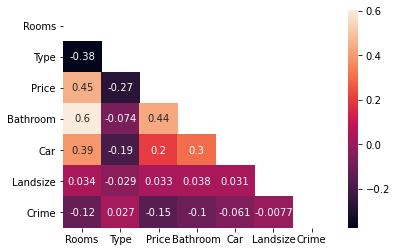

In [37]:
# Import for correlation matrix
import seaborn as sn
# Computing the correlation matrix
summed_corrMatrix = df.corr()
# Mask to cover the upper triangle so we only see one result for each correlation
mask = np.triu(np.ones_like(summed_corrMatrix, dtype=bool))
# Drawing the heatmap with the mask
sn.heatmap(summed_corrMatrix, mask = mask, annot = True);
# Exporting plot as PNG
# plt.savefig("Output/traits_corrMatrix")
# Colour scheme, add to the end of True
# , cmap = "RdYlGn_r"
# Display plot
plt.show

In [9]:
df = df.loc[:, ['suburb', 'rooms', 'type', 'price', 'bathroom', 'car']]
df.head()

,suburb,rooms,type,price,bathroom,car
0,Abbotsford,2,h,1480000.0,1.0,1.0
1,Abbotsford,2,h,1035000.0,1.0,0.0
2,Abbotsford,3,h,1465000.0,2.0,0.0
3,Abbotsford,3,h,850000.0,2.0,1.0
4,Abbotsford,4,h,1600000.0,1.0,2.0


# Model

In [22]:
# Assign the data to X and y
X = df[['suburb', 'rooms', 'type', 'bathroom', 'car']]
y = df["price"].values.reshape(-1, 1)
print(X.shape, y.shape)

(20423, 5) (20423, 1)


In [23]:
X = pd.get_dummies(X)
X

,rooms,bathroom,car,suburb_Abbotsford,suburb_Aberfeldie,suburb_Airport West,suburb_Albanvale,suburb_Albert Park,suburb_Albion,suburb_Alphington,...,suburb_Windsor,suburb_Wollert,suburb_Wonga Park,suburb_Wyndham Vale,suburb_Yallambie,suburb_Yarra Glen,suburb_Yarraville,type_h,type_t,type_u
0,2,1.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,1.0,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,2.0,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,2.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,1.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20418,3,2.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
20419,4,2.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
20420,3,1.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
20421,3,1.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [24]:
y

array([[1480000.],
       [1035000.],
       [1465000.],
       ...,
       [ 730000.],
       [ 615000.],
       [ 640000.]])

In [25]:
X.head()

,rooms,bathroom,car,suburb_Abbotsford,suburb_Aberfeldie,suburb_Airport West,suburb_Albanvale,suburb_Albert Park,suburb_Albion,suburb_Alphington,...,suburb_Windsor,suburb_Wollert,suburb_Wonga Park,suburb_Wyndham Vale,suburb_Yallambie,suburb_Yarra Glen,suburb_Yarraville,type_h,type_t,type_u
0,2,1.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,1.0,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,2.0,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,2.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,1.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [27]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [28]:
# Fit the model to the training data and calculate the scores for the training and testing data
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

In [29]:
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.6723624099116694
Testing Score: -6.325650229834142e+16


Text(0.5, 1.0, 'Residual Plot')

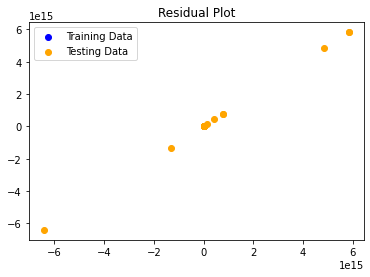

In [30]:
# Plot the Residuals for the Training and Testing data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [20]:
import joblib

In [30]:
joblib_file = "simple_LR.joblib"  
joblib.dump(model, joblib_file)

['simple_LR.joblib']